# In-App Format Test Results

https://test.financialcrossing.net/jira/browse/AE-2533

In [13]:
from dataclasses import dataclass


@dataclass
class Experiment:
    Campaign_name: str
    Camp_description: str
    Campaign_API_Identifier: str
    control_id: str
    variant_id1_name: str
    variant_id1: str
    variant_id2_name: str
    variant_id2: str
    variant_id3_name: str
    variant_id3: str
    variant_id4_name: str
    variant_id4: str
    send_date: str
        
Activate_RU = Experiment(
    "Activate_RU",
    "Returning users who've funded, but haven't enrolled in CBO",
    "93bd3ed6-b0e1-44bf-9ca4-86dd4879c746",
    "cb580324-bfb7-4836-ba5c-4161081cebec",
    "1_modal",
    "415bb60c-97be-4afa-bccf-410f609f6d92",
    "2_fullscreen",
    "c0c88bae-dc5b-4df4-867e-f4656b759937",
    '',
    '',
    '',
    '',
    '2020-09-11'
)
        
Activate_NU = Experiment(
    "Activate_NU",
    "New users who've funded, but haven't enrolled in CBO ",
    "cf7ab4f6-64a1-4a30-9658-a865dabf4162",
    "9ee47765-987f-4f08-911e-61422670f127",
    "1_modal",
    "921b508b-241c-4eeb-b725-24bb5691502d",
    "2_fullscreen",
    "84be47f6-727d-418b-aeb5-abfd526318f9",
    '',
    '',
    '',
    '',
    '2020-09-11'
)
        
Fund_RU = Experiment(
    "Fund_RU",
    "Returning Users who have enrolled, but haven't funded yet",
    "da4f0e37-a38c-45f5-9006-831c895adb8c",
    "bf3f6624-02f6-449d-a19f-f9e6ea2192c1",
    "1a_slide-bot",
    "448f2a13-4750-455d-87ed-1d8ce2601c69",
    "1b_slide-top",
    "01e0602e-aa46-4a26-8a72-8bfb5d370171",
    "2_modal",
    "df3a5eb6-2388-45d9-bd70-68b7e82883a9",
    "3_fullscreen",
    "6331f698-0ca3-41f8-89eb-7d71c68115e4",
    '2020-09-11'
)

Fund_NU = Experiment(
    "Fund_NU",
    "New Users who have enrolled, but haven't funded yet",
    "b09a23b2-c531-4f7b-b495-62781edd3800",
    "429378c2-98b3-4aa9-8576-5387055393b6",
    "1_modal",
    "e058fa88-3465-4c0a-8a79-939c598a8580",
    "2_fullscreen",
    "d4c7be4d-463c-4b07-ab29-ce2cc38a75ad",
    '',
    '',
    '',
    '',
    '2020-09-11'
)

Enroll_RU = Experiment(
    "Enroll_RU",
    "Returning Users who haven't enrolled in Cash yet",
    "8f1a4354-05fe-4b51-8958-50decdeb52fe",
    'eddf40f6-3b0c-42a3-ac94-4eef8bba5ea7',
    "1a_slide-bot",
    'fed7a1a2-68f2-4c86-b47a-a29e186ab4e2',
    "1b_slidedown-top",
    '758e0b92-e236-48a7-b3ef-b25964816340',
    "2_modal",
    'fe684510-604c-42fe-8b76-7c8e5ace7207',
    "3_fullscreen",
    'c473ba5e-e773-473d-b7cf-0372c7fa3908',
    '2020-09-11'
)

Enroll_NU = Experiment(
    "Enroll_NU", 
    "New Users who haven't enrolled in Cash",
    "2b8a1148-8c2f-4e73-8e6a-bf8fab48612c",
    '17d9f3c9-d076-4214-b4b2-39f4a7e36106',
    "1_modal",
    'd4fbe974-36b1-46e1-a028-070589401922',
    "2_fullscreen",
    'a5ef90d5-4c74-4f6c-8950-27a039094bcf',
    '',
    '',
    '',
    '',
    '2020-09-11'
)
6f382c4d-8431-4705-b08d-1a85046ffa78

In [15]:
Enroll_NU.variant_id1_name

'1_modal'

In [1]:
import pandas as pd

import sys
sys.path.append('C:/Users\mvinasco/Documents/utilities')
import connect_redshift as crs
engine = crs.RedShift_engine()

In [2]:
import numpy as np

### Query

In [22]:
query1 = f"""
with send_info AS (
    select sl.usertoken,  sl.campaign_name, date_trunc('day',sl.send_date) send_date,
           sl.mailing_id,
    case sl.message_id
    when '{Enroll_NU.control_id}' then '{Enroll_NU.Campaign_name+ '_Control'}'
    when '{Enroll_RU.control_id}' then '{Enroll_RU.Campaign_name+ '_Control'}'
    when '{Fund_NU.control_id}' then '{Fund_NU.Campaign_name+ '_Control'}'
    when '{Fund_RU.control_id}' then '{Fund_RU.Campaign_name+ '_Control'}'
    when '{Activate_NU.control_id}' then '{Activate_NU.Campaign_name+ '_Control'}'
    when '{Activate_RU.control_id}' then '{Activate_RU.Campaign_name+ '_Control'}'
    
    when '{Enroll_NU.variant_id1_name}' then '{Enroll_NU.Campaign_name 
                + Enroll_NU.variant_id1_name}'
    
    
                
    """



In [23]:
query1

"\nwith send_info AS (\n    select sl.usertoken,  sl.campaign_name, date_trunc('day',sl.send_date) send_date,\n           sl.mailing_id,\n    case sl.message_id\n    when '17d9f3c9-d076-4214-b4b2-39f4a7e36106' then 'Enroll_NU_Control'\n    when 'eddf40f6-3b0c-42a3-ac94-4eef8bba5ea7' then 'Enroll_RU_Control'\n    when '429378c2-98b3-4aa9-8576-5387055393b6' then 'Fund_NU_Control'\n    when 'bf3f6624-02f6-449d-a19f-f9e6ea2192c1' then 'Fund_RU_Control'\n    when '9ee47765-987f-4f08-911e-61422670f127' then 'Activate_NU_Control'\n    when 'cb580324-bfb7-4836-ba5c-4161081cebec' then 'Activate_RU_Control'\n    \n    when '1_modal' then 'Enroll_NU1_modal'\n    \n    \n                \n    "

In [ ]:
"""
   Campaign_name: str
    Camp_description: str
    Campaign_API_Identifier: str
    control_id: str
    variant_id1_name: str    
    send_date: str
        
Activate_RU
Activate_NU 
Fund_RU 
Fund_NU 
Enroll_RU =
Enroll_NU 

"""

In [3]:
query1 = """
with send_info AS (
    select sl.usertoken,  sl.campaign_name, date_trunc('day',sl.send_date) send_date,
           sl.mailing_id,
            case sl.message_id
                        when 'f8e63b69-2915-45d0-87f9-93deb363b7a0' then 'Control'
                        when '8c004a0f-abca-462a-87c4-b074463e07ef' then 'Moprheus'
                        when '3d22aa86-884a-4d89-8a22-3425d9f12a7c' then 'Control'
                        when '3f8d75ae-e64d-42e5-bcfc-c78e4b6359ee' then 'Moprheus'
                        when '5e709269-4487-4e2c-b9d1-b2bb78e8a440' then 'Control'
                        when '92f2e43a-8fc0-457e-bc5b-acda380c7fd8' then 'Moprheus'
                        when '444101aa-e481-44f7-bf38-defbeed42718' then 'Control'
                        when 'fd7737f1-9031-4dd4-846f-2ede2bc280f4' then 'Moprheus'
                        when '14a8c0b4-6902-4616-8af7-653b35329f91' then 'Control'
                        when '3e580317-7f70-45ab-b7ad-3f1c872410e0' then 'Moprheus'
                        end as variant
    from  email_ops.strongview_email_send_log sl
    where campaign_id in ('ca260f98-8df4-4fe5-a316-dbee07ce065d', '475fbae3-ff2b-42af-af6b-d42099b3732a',
                         'eafeab81-6f93-464b-8d7c-3249cd2c4fd1', 'da1bf5fa-1e80-4b18-9ce6-976517945570',
                         '37426904-aece-4559-9252-9fffd9a125db'
        )
    and sl.provider NOT IN  ('MIXPANEL','BRAZE_PUSH')
       and sl.send_date >= '2020-06-19'
    ),

-- activity info includes opens and clicks on Test and Control emails only
activity_info as (
     Select si.usertoken, si.variant, si.campaign_name, si.send_date,  si.mailing_id,
            sum(case when event_type='open' THEN 1 ELSE 0 END) AS opens,
            sum(case when event_type='click' THEN 1 ELSE 0 END ) AS clicks

     from send_info si
         left join email_ops.email_activity_strongview a
             on cast(si.usertoken as varchar)=cast(a.user_token as varchar)
             and si.mailing_id=a.mailing_id
    group by 1,2,3,4,5
      ),

clk_apply as (
             select sl.usertoken, sl.variant, sl.campaign_name, sl.clicks, sl.opens,
                    click_applies, ca.Revenue, ca.Conversions, ca.min_ca_time
             from activity_info sl
                      left outer join
                  (Select c.usertoken,
                              COALESCE(c.mailing_id,
                                       SUBSTRING(c.ref_code, LEN(c.ref_code) - position('_' in reverse(ref_code)) + 2,
                                                 50))               mailing_id,
                          count(distinct c.clickid)          AS click_applies,
                          count(distinct r.clickid)          AS Conversions,
                          sum(coalesce(r.amountreported, 0)) AS Revenue,
                          min(c.createdate) as min_ca_time

                   from public.click_applies_properties c
                            left outer join revenue.all_partners_revenue_data r
                                on c.usertoken = r.usertoken
                                    and c.clickid = r.clickid
                                    and date_trunc('day', c.createdate) >= '2020-06-19'
                   group by 1, 2) ca
                  on sl.mailing_id = ca.mailing_id
                      and sl.usertoken = ca.usertoken
         ),

 logging_in as (
         select ca.usertoken, ca.variant, ca.campaign_name, ca.clicks, ca.opens,
                    ca.click_applies, ca.Revenue, ca.Conversions,
                    ua.action_type

         from clk_apply ca
         left outer join (
             select usertoken,
                    SUM(case when ua.action_type is not null then 1 else 0 end) as action_type,
                    MIN( ua.action_timestamp) as min_logging_ts
             from user_action ua
             where  ua.action_timestamp >= '2020-06-19'
             AND ua.action_type = 'LOGGED_IN'
             group by 1
             ) ua
               ON ca.usertoken = cast(ua.usertoken as varchar)
         )

 SELECT variant, campaign_name,
     count(distinct usertoken) as users, sum(opens) as opens, sum(clicks) as clicks,
     sum(click_applies) as total_click_applies, sum(case when click_applies is not null then 1 else 0 end) as unq_click_applies,
     sum(Revenue) as email_revenue, sum(Conversions) as conversions, sum(action_type) as logins
 from   logging_in
 group by 1,2;
 """
ocf_df = pd.read_sql_query(query1, engine)
ocf_df.head()

,variant,campaign_name,users,opens,clicks,total_click_applies,unq_click_applies,email_revenue,conversions,logins
0,Moprheus,o- What's Changed - Increase - 6.1.20,152760,143911,54024,1922,1476,1633.00,50,898076
1,Moprheus,o - Score Over Time - 6.1.20,1743342,970410,146108,8068,6304,4850.00,140,4100710
2,Control,o - Score Over Time - 6.1.20,1743122,969445,144694,6670,5556,4670.08,159,4139472
3,Moprheus,o- Become Eligible for Awesome Things - 6.1.20,1397180,1317280,139814,8112,6236,3962.54,148,3773208
4,Moprheus,o- New Card Decline - Universal Link - 6.1.20,593182,288036,38596,2366,1772,1640.00,74,1265414


In [ ]:
from dataclasses import dataclass

@dataclass
class Experiment:
    control_id: str
    variant_id: str
    campaign_id: str
    send_date: str
        
Whats_Changed_Decrease = Experiment('f8e63b69-2915-45d0-87f9-93deb363b7a0' , '8c004a0f-abca-462a-87c4-b074463e07ef', 
                                          'ca260f98-8df4-4fe5-a316-dbee07ce065d', '2020-06-19')

Whats_Changed_Increase = Experiment('3d22aa86-884a-4d89-8a22-3425d9f12a7c', '3f8d75ae-e64d-42e5-bcfc-c78e4b6359ee', 
                                         '475fbae3-ff2b-42af-af6b-d42099b3732a', '2020-06-19')

Score_Over_Time = Experiment('5e709269-4487-4e2c-b9d1-b2bb78e8a440', '92f2e43a-8fc0-457e-bc5b-acda380c7fd8', 
                                'eafeab81-6f93-464b-8d7c-3249cd2c4fd1', '2020-06-19')

New_Card_Decline = Experiment('444101aa-e481-44f7-bf38-defbeed42718', 'fd7737f1-9031-4dd4-846f-2ede2bc280f4', 
                                'da1bf5fa-1e80-4b18-9ce6-976517945570', '2020-06-19')

Awesome_Things = Experiment('14a8c0b4-6902-4616-8af7-653b35329f91', '3e580317-7f70-45ab-b7ad-3f1c872410e0',
                             '37426904-aece-4559-9252-9fffd9a125db', '2020-06-19')

In [ ]:
mp_csweb_camp = [Whats_Changed_Decrease, Whats_Changed_Increase, Score_Over_Time, New_Card_Decline, Awesome_Things]
for camp in mp_csweb_camp:
    print(camp.campaign_id)

Pilot Campaigns from June 19 - 21 to be analyzed for parity:

What’s Changed Decrease
Campaign link: https://dashboard-03.braze.com/engagement/campaigns/5e5aa66a3ea25b0a6398c695/5ccb40cad5b682337738a4bb?campaignName=o-%20What%27s%20Changed%20-%20Decrease%20-%206.1.20&page=-2&startDate=1592550000
Dates: June 19 - 21
Campaign ID: ca260f98-8df4-4fe5-a316-dbee07ce065d
Control ID: f8e63b69-2915-45d0-87f9-93deb363b7a0
Varient ID: 8c004a0f-abca-462a-87c4-b074463e07ef

What’s Changed Increase
Campaign link: https://dashboard-03.braze.com/engagement/campaigns/5e5aa4c336e9d93c7b22d60b/5ccb40cad5b682337738a4bb?campaignName=o-%20What%27s%20Changed%20-%20Increase%20-%206.1.20&page=-2&startDate=1592550000
Dates: June 19 - 21
Campaign ID: 475fbae3-ff2b-42af-af6b-d42099b3732a
Control ID: 3d22aa86-884a-4d89-8a22-3425d9f12a7c
Varient ID: 3f8d75ae-e64d-42e5-bcfc-c78e4b6359ee

Score Over Time
Campaign link: https://dashboard-03.braze.com/engagement/campaigns/5e62b3a83f88484fe6fe1f1e/5ccb40cad5b682337738a4bb?campaignName=o%20-%20Score%20Over%20Time%20-%206.1.20&page=-2&startDate=1592550000
Dates: June 19 - 21
Campaign ID: eafeab81-6f93-464b-8d7c-3249cd2c4fd1
Control ID: 5e709269-4487-4e2c-b9d1-b2bb78e8a440
Varient ID: 92f2e43a-8fc0-457e-bc5b-acda380c7fd8

New Card Decline
Campaign link: https://dashboard-03.braze.com/engagement/campaigns/5e5d902ad21f7924dbcdd2c4/5ccb40cad5b682337738a4bb?campaignName=o-%20New%20Card%20Decline%20-%20Universal%20Link%20-%206.1.20&page=-2&startDate=1592550000
Dates: June 19 - 21
Campaign ID: da1bf5fa-1e80-4b18-9ce6-976517945570
Control ID: 444101aa-e481-44f7-bf38-defbeed42718
Varient ID: fd7737f1-9031-4dd4-846f-2ede2bc280f4

Awesome Things
Campaign link: https://dashboard-03.braze.com/engagement/campaigns/5e5d9285125ebf29b2b5a037/5ccb40cad5b682337738a4bb?campaignName=o-%20Become%20Eligible%20for%20Awesome%20Things%20-%206.1.20&page=-2&startDate=1592550000
Dates: June 19 - 21
Campaign ID: 37426904-aece-4559-9252-9fffd9a125db
Control ID: 14a8c0b4-6902-4616-8af7-653b35329f91
Varient ID: 3e580317-7f70-45ab-b7ad-3f1c872410e0

## Data Exploration

In [4]:
CONTROL = 'Control'
VARIATION = 'Moprheus'
COHORT = 'users'

In [5]:
ocf_df


,variant,campaign_name,users,opens,clicks,total_click_applies,unq_click_applies,email_revenue,conversions,logins
0,Moprheus,o- What's Changed - Increase - 6.1.20,152760,143911,54024,1922,1476,1633.00,50,898076
1,Moprheus,o - Score Over Time - 6.1.20,1743342,970410,146108,8068,6304,4850.00,140,4100710
2,Control,o - Score Over Time - 6.1.20,1743122,969445,144694,6670,5556,4670.08,159,4139472
3,Moprheus,o- Become Eligible for Awesome Things - 6.1.20,1397180,1317280,139814,8112,6236,3962.54,148,3773208
4,Moprheus,o- New Card Decline - Universal Link - 6.1.20,593182,288036,38596,2366,1772,1640.00,74,1265414
5,Control,o- What's Changed - Decrease - 6.1.20,71961,65670,14575,330,247,397.00,8,373067
6,Control,o- Become Eligible for Awesome Things - 6.1.20,1398136,1318489,141968,11792,9765,4289.58,148,3757032
7,Control,o- What's Changed - Increase - 6.1.20,154013,146297,54895,1053,863,704.00,20,958480
8,Control,o- New Card Decline - Universal Link - 6.1.20,593628,288127,38640,2899,2337,1919.00,65,1282804
9,Moprheus,o- What's Changed - Decrease - 6.1.20,72464,66109,14867,370,303,190.00,9,366154


In [6]:
import xlwings as xw

def writes_df_excel(sht, df, rangename):
    # clears existing data
    x0 = sht.range('A1').end('down')
    y0 = sht.range('A1').end('right')
    sht.range(x0,y0).clear()

    sht.range('A1').options(index=False).value  = df
    tbl_range = sht.range("A1").expand('table')
    sht.api.ListObjects.Add(1, sht.api.Range(tbl_range.address))
    
    sht.range(tbl_range).expand().name = rangename

In [7]:
wb = xw.Book(r'C:\Users\mvinasco\Documents\Morpheus\ocf_test.xlsx')
sht = wb.sheets['5OCFS']
writes_df_excel(sht, df=ocf_df, rangename='kpis')

# A|B Test Analysis


In [8]:
# Analysis using Beta distributions

# https://towardsdatascience.com/bayesian-a-b-testing-with-python-the-easy-guide-d638f89e0b8a
from scipy.stats import beta
import numpy as np
from calc_prob import calc_prob_between

In [9]:
import matplotlib.pyplot as plt

def calc_beta_mode(a, b):
    '''this function calculate the mode (peak) of the Beta distribution'''
    return (a-1)/(a+b-2)

def plot(betas, names, linf=0, lsup=0.01):
    '''this function plots the Beta distribution'''
    x=np.linspace(linf,lsup, 100)
    for f, name in zip(betas,names) :
        y=f.pdf(x) #this for calculate the value for the PDF at the specified x-points
        y_mode=calc_beta_mode(f.args[0], f.args[1])
        y_var=f.var() # the variance of the Beta distribution
        plt.plot(x,y, label=f"{name} sample, conversion rate: {y_mode:0.1E} $\pm$ {y_var:0.1E}")
        plt.yticks([])
    plt.legend()
    plt.show()


In [10]:
# Metrics
T_C = [ CONTROL, VARIATION]
kpi_names =  ['opens', 'clicks', 'total_click_applies', 'unq_click_applies' ,'conversions', 'logins']

mp_csweb_camp = ocf_df['campaign_name'].unique()


In [11]:
ocf_pt = pd.pivot_table(ocf_df, index='campaign_name', columns='variant', aggfunc='sum')
ocf_pt

clicks          conversions  \
variant                                        Control Moprheus     Control   
campaign_name                                                                 
o - Score Over Time - 6.1.20                    144694   146108         159   
o- Become Eligible for Awesome Things - 6.1.20  141968   139814         148   
o- New Card Decline - Universal Link - 6.1.20    38640    38596          65   
o- What's Changed - Decrease - 6.1.20            14575    14867           8   
o- What's Changed - Increase - 6.1.20            54895    54024          20   

                                                        email_revenue  \
variant                                        Moprheus       Control   
campaign_name                                                           
o - Score Over Time - 6.1.20                        140       4670.08   
o- Become Eligible for Awesome Things - 6.1.20      148       4289.58   
o- New Card Decline - Universal Link - 6.1.20        74       1919.00   
o- What's Changed - Decrease - 6.1.20                 9        397.00   
o- What's Changed - Increase - 6.1.20                50        704.00   

                                                          logins           \
variant                                        Moprheus  Control Moprheus   
campaign_name                                                               
o - Score Over Time - 6.1.20                    4850.00  4139472  4100710   
o- Become Eligible for Awesome Things - 6.1.20  3962.54  3757032  3773208   
o- New Card Decline - Universal Link - 6.1.20   1640.00  1282804  1265414   
o- What's Changed - Decrease - 6.1.20            190.00   373067   366154   
o- What's Changed - Increase - 6.1.20           1633.00   958480   898076   

                                                  opens           \
variant                                         Control Moprheus   
campaign_name                                                      
o - Score Over Time - 6.1.20                     969445   970410   
o- Become Eligible for Awesome Things - 6.1.20  1318489  1317280   
o- New Card Decline - Universal Link - 6.1.20    288127   288036   
o- What's Changed - Decrease - 6.1.20             65670    66109   
o- What's Changed - Increase - 6.1.20            146297   143911   

                                               total_click_applies           \
variant                                                    Control Moprheus   
campaign_name                                                                 
o - Score Over Time - 6.1.20                                  6670     8068   
o- Become Eligible for Awesome Things - 6.1.20               11792     8112   
o- New Card Decline - Universal Link - 6.1.20                 2899     2366   
o- What's Changed - Decrease - 6.1.20                          330      370   
o- What's Changed - Increase - 6.1.20                         1053     1922   

                                               unq_click_applies           \
variant                                                  Control Moprheus   
campaign_name                                                               
o - Score Over Time - 6.1.20                                5556     6304   
o- Become Eligible for Awesome Things - 6.1.20              9765     6236   
o- New Card Decline - Universal Link - 6.1.20               2337     1772   
o- What's Changed - Decrease - 6.1.20                        247      303   
o- What's Changed - Increase - 6.1.20                        863     1476   

                                                  users           
variant                                         Control Moprheus  
campaign_name                                                     
o - Score Over Time - 6.1.20                    1743122  1743342  
o- Become Eligible for Awesome Things - 6.1.20  1398136  1397180  
o- New Card Decline - Universal Link - 6.1.20    593628   593182  
o- What's Change

In [12]:
 # expected click applies (number should be differnt for each metric)
priorf = {metric: {campaign: 0 for campaign in mp_csweb_camp} for metric in kpi_names}

for campaign in mp_csweb_camp:
    for metric in kpi_names:
        priorf[metric][campaign] = ocf_pt.loc[campaign, metric][CONTROL]

campaign | metric | mean_Test | mean_Control | lift_pts | lift_% | probability
o- What's Changed - Increase - 6.1.20 | opens | 0.6516344301387211 | 0.6551487101635218 | -0.003514280024800698 | -0.005364095159286128 | 0.9997559256401606
o- What's Changed - Increase - 6.1.20 | clicks | 0.41485050466577794 | 0.4161817720041091 | -0.0013312673383311657 | -0.003198764164803502 | 0.8364388072409797
o- What's Changed - Increase - 6.1.20 | total_click_applies | 0.019210155876693398 | 0.013489709772673409 | 0.005720446104019989 | 0.42405998352967555 | 1.0000000002179394
o- What's Changed - Increase - 6.1.20 total_click_applies


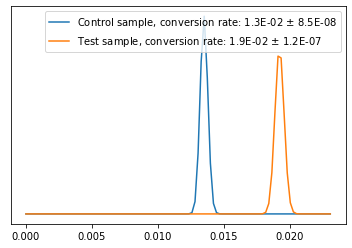

o- What's Changed - Increase - 6.1.20 | unq_click_applies | 0.015140530533511127 | 0.011082644681165283 | 0.004057885852345844 | 0.36614778954721283 | 1.000000000141991
o- What's Changed - Increase - 6.1.20 unq_click_applies


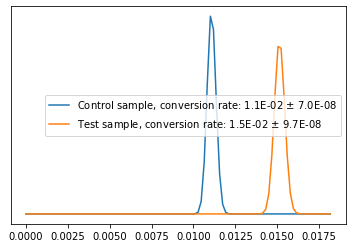

o- What's Changed - Increase - 6.1.20 | conversions | 0.0004581151832460733 | 0.0002596508993658027 | 0.0001984642838802706 | 0.7643504581151832 | 0.9983206059323761
o- What's Changed - Increase - 6.1.20 | logins | 0.8970082909765572 | 0.9256325408394991 | -0.028624249862941875 | -0.03092398829991566 | 1.0000000010555536
campaign | metric | mean_Test | mean_Control | lift_pts | lift_% | probability
o - Score Over Time - 6.1.20 | opens | 0.526814986127979 | 0.5265843783235905 | 0.00023060780438843853 | 0.00043793134373372564 | 0.7345713506473203
o - Score Over Time - 6.1.20 | clicks | 0.14305982594835517 | 0.142379619288466 | 0.0006802066598891876 | 0.004777415920118915 | 0.9750271384108529
o - Score Over Time - 6.1.20 | total_click_applies | 0.00838968009007891 | 0.007594812754275356 | 0.0007948673358035537 | 0.10465924065818452 | 1.0000000033166956
o - Score Over Time - 6.1.20 total_click_applies


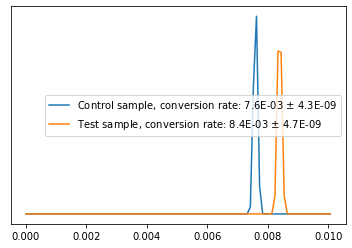

o - Score Over Time - 6.1.20 | unq_click_applies | 0.006759937849610192 | 0.006334388684747873 | 0.000425549164862319 | 0.06718077876827622 | 0.9999996160866135
o - Score Over Time - 6.1.20 unq_click_applies


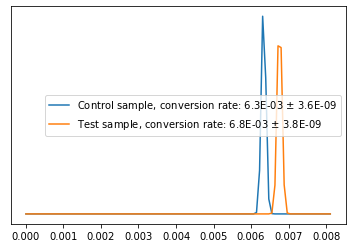

o - Score Over Time - 6.1.20 | conversions | 0.0001714783845474462 | 0.0001823980177121094 | -1.0919633164663218e-05 | -0.059867060517611446 | 0.7784957581026287
o - Score Over Time - 6.1.20 | logins | 0.8221858765555083 | 0.8260715904285604 | -0.0038857138730520324 | -0.004703846395487527 | 0.9999999649684247
campaign | metric | mean_Test | mean_Control | lift_pts | lift_% | probability
o- Become Eligible for Awesome Things - 6.1.20 | opens | 0.6533628578751749 | 0.6535076828064833 | -0.00014482493130840712 | -0.00022161167361714503 | 0.6672208917794401
o- Become Eligible for Awesome Things - 6.1.20 | clicks | 0.16761603601417155 | 0.16880133549574572 | -0.0011852994815741702 | -0.007021860805147736 | 0.9981675304725145
o- Become Eligible for Awesome Things - 6.1.20 | total_click_applies | 0.014009363976001644 | 0.016588357763835354 | -0.0025789937878337096 | -0.15547010888903245 | 0.9999999980320521
o- Become Eligible for Awesome Things - 6.1.20 total_click_applies


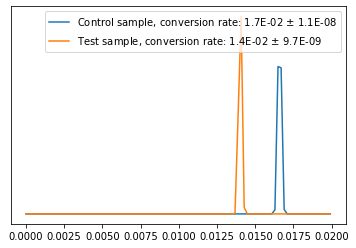

o- Become Eligible for Awesome Things - 6.1.20 | unq_click_applies | 0.011294478051259608 | 0.013776164484441328 | -0.00248168643318172 | -0.1801434961076803 | 1.0000000006688368
o- Become Eligible for Awesome Things - 6.1.20 unq_click_applies


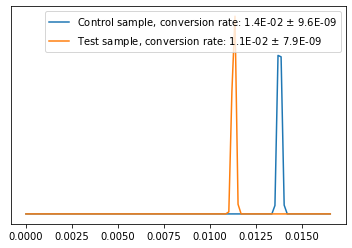

o- Become Eligible for Awesome Things - 6.1.20 | conversions | 0.00021181043538493684 | 0.0002116656369419464 | 1.447984429904254e-07 | 0.0006840904602296844 | 0.5033179010706956
o- Become Eligible for Awesome Things - 6.1.20 | logins | 0.845026799849718 | 0.8431211148762371 | 0.00190568497348087 | 0.002260274283085187 | 1.0000000144819903
campaign | metric | mean_Test | mean_Control | lift_pts | lift_% | probability
o- New Card Decline - Universal Link - 6.1.20 | opens | 0.4926845077456141 | 0.4925744647750799 | 0.00011004297053424095 | 0.00022340372553516136 | 0.5668370598779309
o- New Card Decline - Universal Link - 6.1.20 | clicks | 0.11519817677959378 | 0.11518717916614499 | 1.0997613448790466e-05 | 9.547602023422767e-05 | 0.5079575295540487
o- New Card Decline - Universal Link - 6.1.20 | total_click_applies | 0.00878994290293499 | 0.009672586774681111 | -0.0008826438717461221 | -0.09125210166700432 | 0.9999997831749166
o- New Card Decline - Universal Link - 6.1.20 total_click_app

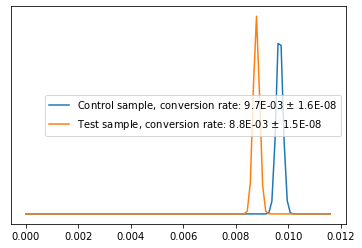

o- New Card Decline - Universal Link - 6.1.20 | unq_click_applies | 0.006872892469089547 | 0.007812108266393895 | -0.0009392157973043477 | -0.12022565039768632 | 0.999999999773857
o- New Card Decline - Universal Link - 6.1.20 unq_click_applies


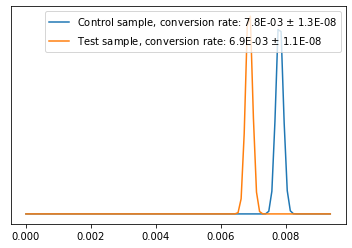

o- New Card Decline - Universal Link - 6.1.20 | conversions | 0.00023427808640310663 | 0.000218944418433099 | 1.5333667970007618e-05 | 0.07003452328104448 | 0.7108470597730356
o- New Card Decline - Universal Link - 6.1.20 | logins | 0.8067069985659066 | 0.8120976084091217 | -0.005390609843215155 | -0.00663788415012725 | 0.9999999875453568
campaign | metric | mean_Test | mean_Control | lift_pts | lift_% | probability
o- What's Changed - Decrease - 6.1.20 | opens | 0.6465967301917529 | 0.6460371567282011 | 0.0005595734635518435 | 0.0008661629717797573 | 0.6455669632896508
o- What's Changed - Decrease - 6.1.20 | clicks | 0.289743539276084 | 0.2882970201066155 | 0.0014465191694684743 | 0.005017461397740202 | 0.763740647613479
o- What's Changed - Decrease - 6.1.20 | total_click_applies | 0.009572780482468136 | 0.009088280249514602 | 0.00048450023295353375 | 0.053310441541391786 | 0.8320549018924218
o- What's Changed - Decrease - 6.1.20 total_click_applies


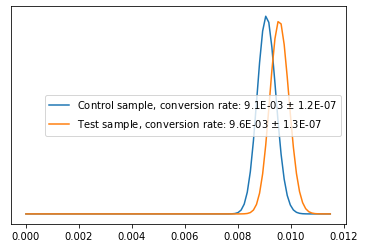

o- What's Changed - Decrease - 6.1.20 | unq_click_applies | 0.007538583842758848 | 0.006818024981022704 | 0.0007205588617361439 | 0.10568439742326377 | 0.9482800817776025
o- What's Changed - Decrease - 6.1.20 unq_click_applies


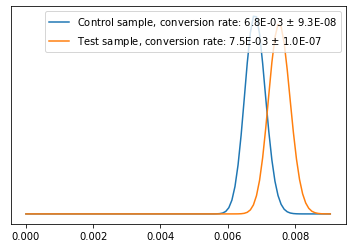

o- What's Changed - Decrease - 6.1.20 | conversions | 0.00023454746136865342 | 0.00022229323256040123 | 1.2254228808252193e-05 | 0.055126414183223005 | 0.5621717940865911
o- What's Changed - Decrease - 6.1.20 | logins | 0.9030329905521391 | 0.9120383329564415 | -0.009005342404302397 | -0.009873863936300676 | 1.0000000019271116


In [13]:
#impressions and conversions for the Control and Test set
for campaign in mp_csweb_camp:
    print('campaign | metric | mean_Test | mean_Control | lift_pts | lift_% | probability')
    for metric in kpi_names:
        imps_ctrl,convs_ctrl= ocf_pt.loc[campaign, COHORT][CONTROL], ocf_pt.loc[campaign, metric][CONTROL]
        imps_test, convs_test= ocf_pt.loc[campaign, COHORT][VARIATION], ocf_pt.loc[campaign, metric][VARIATION]

        # expected click applies (number should be differnt for each metric)
        prior = priorf[metric][campaign]  

        #here we create the Beta functions for the two sets
        a_C, b_C = convs_ctrl+prior, imps_ctrl-convs_ctrl+prior
        beta_C = beta(a_C, b_C)
        a_T, b_T = convs_test+prior, imps_test-convs_test+prior
        beta_T = beta(a_T, b_T)

        #calculating the lift
        lift=(beta_T.mean()-beta_C.mean())/beta_C.mean()
        lift_pts =(beta_T.mean()-beta_C.mean())

        #calculating the probability for Test to be better than Control
        if lift < 0:
            prob=calc_prob_between(beta_C, beta_T)
        else:
            prob=calc_prob_between(beta_T, beta_C)


        print(campaign,'|' ,metric, '|', beta_T.mean(), '|', beta_C.mean(), '|', lift_pts, '|', lift, '|',  prob)

        lsup = max(beta_T.mean(), beta_C.mean())*1.2
        if metric in ['total_click_applies', 'unq_click_applies']:
            print(campaign, metric)
            plot([beta_C, beta_T], names=["Control", "Test"], linf=0, lsup=lsup)

# Booststrap

In [ ]:
# Bootstrap

# This functions re sample with replacement and returns a list of arrays with the conversion and size of the resample
# in alphabetical order by pivot_index field and sum== conversions and count==size

def bootstrap(data_df, iterations, metric, pivot_index,  resample_rate=0.9):
    statistics = []
    for i in range(iterations):
        resampled_df = data_df[[metric, pivot_index]].sample(frac=resample_rate, replace=True)
        stats_pt = pd.pivot_table(resampled_df, values= metric, index=[pivot_index], columns=None, aggfunc=['sum', 'count'], fill_value=None, margins=False, dropna=True)
        statistics.append(stats_pt.values)
    return statistics
    

In [ ]:
iterations = 250
metric='all_revenue'

beta_params = bootstrap(data_df=vert_int_model_data_df, iterations=iterations, metric=metric,  pivot_index='test_control')

In [ ]:
delta_beta_means = []
for i in range(iterations):
    delta = beta_params[i][1,0]/beta_params[i][1,1] - beta_params[i][0,0]/beta_params[i][0,1]
    delta_beta_means.append(delta)
    
# Boostraped mean and CI
ci = 95

delta_beta_means  = np.asarray(delta_beta_means)

lower = np.percentile(delta_beta_means, ((100-ci)/2))
upper = np.percentile(delta_beta_means,( ci+((100-ci)/2)))

print(round(delta_beta_means.mean(), 3), round(lower, 2), round(upper, 2), round((upper-lower)/2, 2)  )

In [ ]:
plt.hist(delta_beta_means, normed=True, bins=30)
plt.ylabel('Delta Revenue');

In [ ]:
# Precentage of the time VARIATION better than CONTROl
delta_beta_means[(0 < delta_beta_means)].size / delta_beta_means.size

In [ ]:
vert_int_model_data_df[
    (vert_int_model_data_df['click_apply'] > 0) & (vert_int_model_data_df['test_control'] == 'Test')]['usertoken'].head()

In [ ]:
sample_usertoken = [
    '6bf20a36-6d15-4eea-97d8-8cda0831b957',
        '22d626d5-d1e6-438d-8009-00b274a0f07e',
        'b11d37eb-2047-4d73-b074-9867ba219ee3',
        'b4838712-8510-46de-bad5-35a17efa1d18',
        '04d0b763-57a9-4673-9482-028846ed6829',
        'c6356101-8b52-4384-9a3e-e2c7fade525c',
        '5745b92a-6d93-45b1-9623-a054b3042204',
        '41c5151a-efe7-4509-80af-02515ba537be',
        '5ffe7b2e-9fb3-4226-9cad-721e23a1b2b4',
        'f15e7d94-e83f-46f3-8b65-148996062a3e'
]

vert_int_model_data_df[vert_int_model_data_df['usertoken'].isin(sample_usertoken)].to_csv('sample_vm.csv')